# Assignment 1 - Exploratory Data Analysis

In this Jupiter Notebook we will be exploring data from activity trackers ([DDL Assignment 1](https://learn.hu.nl/mod/book/view.php?id=42352&chapterid=3880)). 
We will explore quantitative variables and its interaction with multiple variables, both quantitative and qualitative. We start by importing the necessary libraries we will be working with to process and visualize data.

In [305]:
# Full libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# Other
from scipy.stats.stats import pearsonr
from scipy.stats import ttest_ind

### Initial data cleaning and merging
Inserting the two .csv files below, seperating the steps file by the __';'__ delimeter as the data was seperated that way.
The survey file was using a comma for seperation, and as it's the default for opening csv's with pandas we don't need to tell pandas.

In [218]:
steps = pd.read_csv("Assignment 1 - steps data.csv", delimiter=";")
survey = pd.read_csv("Assignment 1 - survey data.csv")

Below, we merge the two files on the column both files have in common: the (user) ID. To check if the data correctly merged, we look at the first few and last results.

In [219]:
steps_survey = pd.merge(survey,steps, on="id")
steps_survey.head(3)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
steps_survey.tail(3)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
926,927,Lyon,female,45-54,3,family,primary,169.0,108.0,108.0,...,NaN,NaN,NaN,NaN,14977.0,12778.0,12511.0,NaN,NaN,NaN
927,928,Montpellier,female,35-44,1,single,master or doctorate,167.0,64.0,85.0,...,13101.0,8812.0,3821.0,3817.0,4092.0,15096.0,6024.0,4035.0,NaN,NaN
928,929,Lille,male,25-34,2,couple,bachelor,190.0,83.0,89.0,...,8227.0,12369.0,8710.0,15514.0,7435.0,4978.0,14123.0,15799.0,7121.0,NaN


Looks good! To get the mean steps of all days we calculate it with .mean() function. Pandas automatically ignores all NaN values while calculating the mean this way (the parameter is automatically set up this way), which means we don't have to drop these values in order to calculate this.  

Let's also take a look if the means are correctly calculated!

In [221]:
steps_mean = steps.mean()
steps_mean.head(5)

id             465.000000
20-6-2013     2253.454545
21-6-2013     8968.935065
22-6-2013    10412.117424
23-6-2013     7631.215548
dtype: float64

In [222]:
steps_mean.tail(5)

9-5-2014     10236.531250
10-5-2014    10668.343137
11-5-2014     8982.021053
12-5-2014     8287.642857
13-5-2014             NaN
dtype: float64

The first row takes the mean of the ID's, which are irrelevant for our analysis, as they are no steps value. 
We can see the last column has no value. To check if any other row has no values (to calculate a mean), we calculate the total amount of empty columns. 

In [223]:
sum(steps_mean.isnull())

1

It looks like only our last column has no data, so we can exclude that one as well. 

In [388]:
total_columns = len(steps_mean) -1 
total_rows = steps["id"].count() - 2
steps_mean_df = steps_mean.iloc[1:total_columns]
steps_mean_df_mean = steps_mean_df.mean()
steps_mean_df_median = steps_mean_df.median()

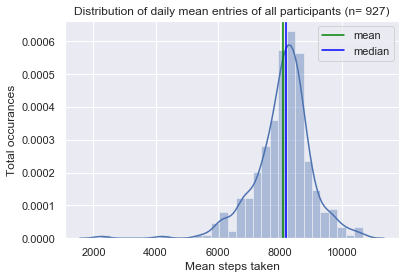

In [389]:
sns.distplot(steps_mean_df)
plt.title(f'Distribution of daily mean entries of all participants (n= {total_rows})')
plt.ylabel('Total occurances')
plt.xlabel('Mean steps taken')
plt.axvline(steps_mean_df_mean, 0, 100, color='green', label='mean')
plt.axvline(steps_mean_df_median, 0, 100, color='blue', label='median')
plt.legend()
plt.show()

In [226]:
type(steps_mean_df)

pandas.core.series.Series

Overall, it seems like the distribution of all the mean steps is normally distributed and left-tailed.
However, looking at the dataset, since there are a lot of missing values, it seems like most people only reported their walking activity (amount of steps) on days where they actively walked. 

To plot timely data, we have to convert the index of the daily mean steps to datetime first, to accurately visualize a timely series of data.

## Plotting time series - Mean steps per day over all participants

<function matplotlib.pyplot.show(*args, **kw)>

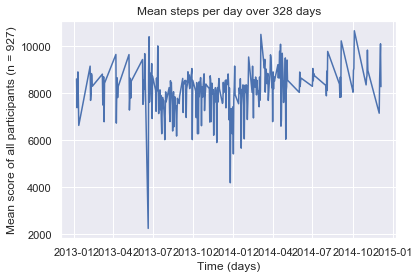

In [227]:
steps_mean_df.index = pd.to_datetime(steps_mean_df.index)
sns.lineplot(data = steps_mean_df)
plt.title(f"Mean steps per day over {total_columns} days") 
plt.xlabel("Time (days)")
plt.ylabel(f"Mean score of all participants (n = {total_rows})")
plt.show

There are a few very big outliers, lets check what date this outlier is so we might get an explanation. 

In [228]:
lowest_steps_mean_df = steps_mean_df[steps_mean_df < 3000]
lowest_steps_mean_df

2013-06-20    2253.454545
dtype: float64

Hmm... Just a weird day with a very low mean. Couldn't find any explanations online for events on this day! Let's exclude it...

<function matplotlib.pyplot.show(*args, **kw)>

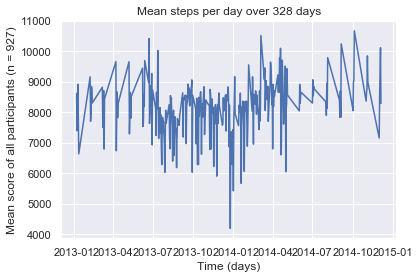

In [229]:
clean_steps_mean_df = steps_mean_df[steps_mean_df > 3000]
sns.lineplot(data = clean_steps_mean_df)
plt.title(f"Mean steps per day over {total_columns} days") 
plt.xlabel("Time (days)")
plt.ylabel(f"Mean score of all participants (n = {total_rows})")
plt.show

Overall, there seems to be more steps taken (and any steps taken in general) in the warmer months over the colder months.

## Analysing (the distribution of) one quantitative variable
Now we're gonna take a look at the distribution of some quantitative variables. We will be looking at the distribution of waist size. To get a quick look at which values are occuring (and if they are reasonable), we quickly plot the data with pandas. We also sort the data by waist size and look at the most extreme low and high values, so we can make a good decision where to draw the line for extreme values (if these appear).

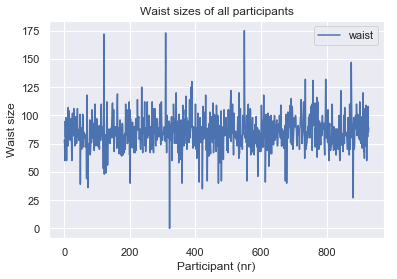

In [383]:
# Plotting waist sizes
waist_plot = steps_survey.plot(y="waist")
plt.title("Waist sizes of all participants")
plt.ylabel("Waist size")
plt.xlabel("Participant (nr)")
plt.show()

In [231]:
# Checking lowest values
lowest_values = steps_survey.sort_values(by="waist",ascending=True)
lowest_values.head(8)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
321,322,Lille,male,<25,1,single,master or doctorate,178.0,83.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,882,Lille,female,45-54,2,couple,master or doctorate,168.0,55.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,422,Lyon,female,45-54,4,family,master or doctorate,160.0,50.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,73,Lille,female,25-34,1,single,master or doctorate,170.0,52.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,50,Lyon,female,35-44,4,family,bachelor,172.0,78.0,39.0,...,4122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,679,Lyon,male,25-34,2,couple,bachelor,181.0,74.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,471,Lille,male,<25,2,couple,master or doctorate,185.0,74.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,360,Bordeaux,male,25-34,2,couple,bachelor,186.0,73.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
highest_values = steps_survey.sort_values(by="waist",ascending=False)
highest_values.head(8)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
549,550,Lyon,female,<25,1,other,master or doctorate,164.0,59.0,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,310,Bordeaux,female,25-34,2,couple,master or doctorate,157.0,59.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,122,Bordeaux,male,<25,1,single,master or doctorate,172.0,72.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,876,Lyon,male,45-54,4,family,master or doctorate,195.0,155.0,147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,736,Lyon,female,35-44,3,family,bachelor,167.0,140.0,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,798,Lyon,male,45-54,2,couple,high school,185.0,140.0,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,759,Lyon,male,25-34,1,single,master or doctorate,186.0,128.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,390,Montpellier,male,45-54,2,other,master or doctorate,183.0,149.0,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like we have some extreme values which are not plausible. Waist sizes of lower than 45 and higher than 130 seem very unlikely [(On Average, n.d.)](https://www.onaverage.co.uk/body-averages/average-waist-size). We will make a new column in the dataframe where the corrected values are displayed in, replacing extreme values with NaN so we can ignore them later, to make more realistic distributions.

In [233]:
def remove_extremes(x):
    if(x > 130.0): 
        return float('NaN')
    if(x < 45.0): 
        return float('NaN')
    else: 
        return x

# Creating the waist_corrected row
steps_survey['waist_corrected'] = steps_survey['waist'].apply(remove_extremes)
column_WC = steps_survey["waist_corrected"]

# Putting the waist_corrected column next to the waist column
steps_survey.insert(steps_survey.columns.get_loc('waist') + 1, "waist_corrected1", column_WC)
steps_survey.pop("waist_corrected")
steps_survey.rename(columns={'waist_corrected1': 'waist_corrected'}, inplace=True)

Before we visualize the distribution of waist size over all participants, we calculate descriptive (summary) statistics first to inplement in our plots.

In [234]:
# Subsetting the dataframe, dropping the NaN variables and calculating descriptive statistics
df_waist_corrected = steps_survey['waist_corrected'].dropna()
waist_descriptive_statistics = df_waist_corrected.describe()
print(waist_descriptive_statistics)

count    905.000000
mean      86.148066
std       12.799948
min       46.000000
25%       77.000000
50%       85.000000
75%       94.000000
max      130.000000
Name: waist_corrected, dtype: float64


The .describe() function doesn't give us variance and the median. Both are calculated below.
The standard deviation is the square root of the variance, so we have to calculate the square of the standard deviaton to get the variance. 

In [235]:
# Standard deviation is square root of variance, so we have to calculate the square of the standard deviaton to get the variance. 
waist_variance = waist_descriptive_statistics[2] * waist_descriptive_statistics[2] 
waist_median = df_waist_corrected.median()
waist_mode = df_waist_corrected.mode()

print(f"Variance: {waist_variance}")
print(f"Median: {waist_median}")

Variance: 163.83867158851976
Median: 85.0


### Visualizing the distribution of one quantitative variable
#### Density plot

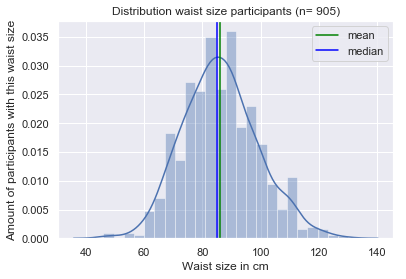

In [236]:
# Plotting a Histogram with density plot
total_participants = len(df_waist_corrected)
sns.distplot(df_waist_corrected, kde=True) 
plt.title(f'Distribution waist size participants (n= {total_participants})')
plt.xlabel("Waist size in cm")
plt.ylabel("Amount of participants with this waist size")
plt.axvline(waist_descriptive_statistics[1], 0, 100, color='green', label='mean')
plt.axvline(waist_median, 0, 100, color='blue', label='median')
plt.legend() 
plt.show()

#### Box plot

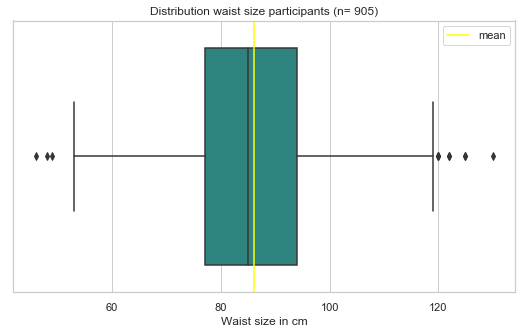

In [237]:
# Showing distribution of waist size in boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.boxplot(df_waist_corrected, palette="viridis")
plt.title(f'Distribution waist size participants (n= {total_participants})')
plt.axvline(waist_descriptive_statistics[1], 0, 100, color='yellow', label='mean')
plt.xlabel("Waist size in cm")
plt.legend()
plt.show()

#### Violin plot

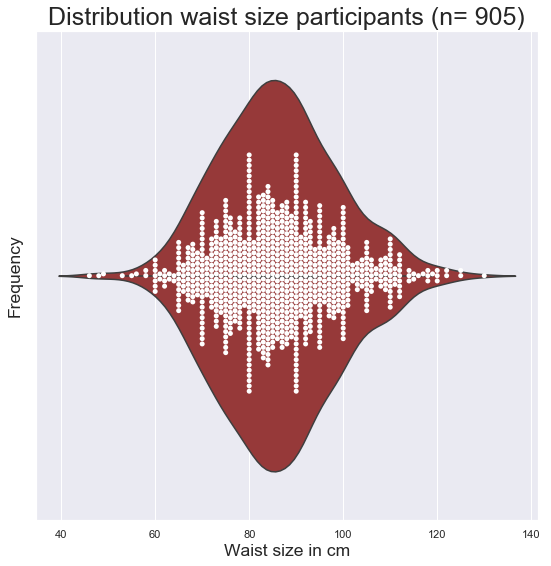

In [238]:
plt.figure(figsize=(9,9))
sns.set(style="darkgrid")
sns.violinplot(df_waist_corrected, color="brown")
sns.swarmplot(df_waist_corrected, color='white')
plt.title(f'Distribution waist size participants (n= {total_participants})', fontsize=25)
plt.ylabel('Frequency', fontsize=17.5)
plt.xlabel('Waist size in cm', fontsize=17.5)
plt.show()

Overall, the waist size is clearly normally distributed, with two peaks at 80-95cm.
Both sides have outliers (left 3, right 4), however there is no clear skewness or tail to be found (very little right skewed).


## Relation / Correlation with quantitative variables
Lets see if there are any quantitative variables which correlate with each other. We will be looking at the relation of mean steps per participant with weight and height. To do this, we have to calculate the mean steps per person first and create a new dataframe based off that (merging it with survey data). We will also leave out empty values, which we leave out by using _dropna()_. Like before, we will leave out the first and last column in our calculation as they provide no valuable data. 

In [239]:
steps_perperson = steps.loc[:,'20-6-2013':'12-5-2014']
steps_perperson['mean'] = steps_perperson.mean(axis=1)
steps_survey["mean_steps"] = steps_perperson["mean"]
steps_survey.head(3)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757.911765
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3403.964706
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4986.550505


In [240]:
height_weight_steps = steps_survey[["height","weight","mean_steps"]]
df_HWS = height_weight_steps.dropna()

Let's take a closer look at some of the possible relations. First, we take a quick look by creating a correlation matrix of our variables:

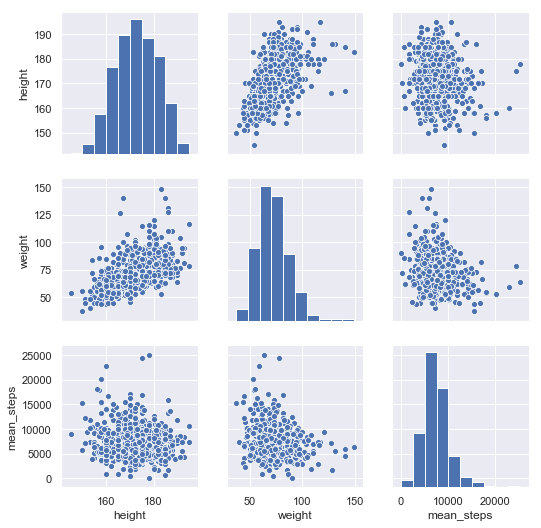

In [241]:
sns.pairplot(df_HWS)
plt.show()

Below, we zoom in on these variables and their possible relations with mean_steps (per person). 

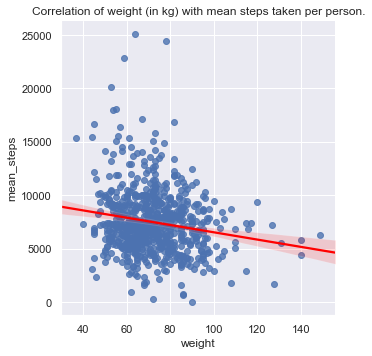

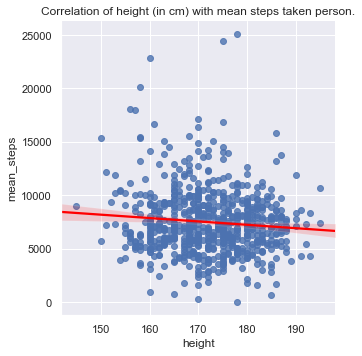

In [242]:
sns.lmplot(x='weight',y='mean_steps',data=df_HWS, fit_reg=True, line_kws={'color': 'red'})
plt.title("Correlation of weight (in kg) with mean steps taken per person.")
plt.show()

sns.lmplot(x='height',y='mean_steps',data=df_HWS, fit_reg=True, line_kws={'color': 'red'})
plt.title("Correlation of height (in cm) with mean steps taken person.")
plt.show()

While looking at the scatterplots, we do not immediatly see a strong (linear) relation, as the dots are relatively spread out over the graph. However, when adding a trend line we can see a negative linear relation within the first graph (the correlation of mean steps with the weight of a person). Overall, people seem to walk less the more weight they have. 

The second graph is so spread out, even when adding a trendline it doesn't really show a strong linear relation.
While it might look like the trendline shows a small negative linear relation, this might just be explained by the strong linear relation between weight and height (see below).

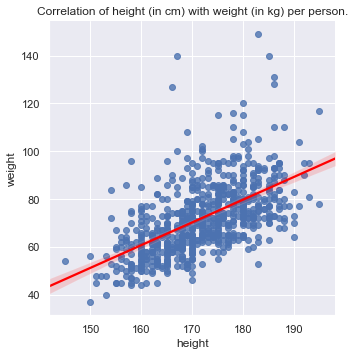

In [243]:
sns.lmplot(x='height',y='weight',data=df_HWS, fit_reg=True, line_kws={'color': 'red'})
plt.title("Correlation of height (in cm) with weight (in kg) per person.")
plt.show()

To say something about the strongness of the relation (from the first two visualizations), we calculate Pearsons R.  

In [244]:
r_weight = pearsonr(df_HWS["mean_steps"],df_HWS["weight"])
r_height = pearsonr(df_HWS["mean_steps"],df_HWS["height"])

_Pearsons r_ is between -1 and 1, which indicates the strength of the correlation. _Pearsons r_ also gives a p-value, which shows if the correlation is significant. 

In [245]:
print(f"Weight and mean steps have a weak negative correlation (r = {r_weight[0]}). This correlation is significant (p = {r_weight[1]}, or < 0.001)")

Weight and mean steps have a weak negative correlation (r = -0.16940707160199922). This correlation is significant (p = 5.655289511792799e-06, or < 0.001)


In [246]:
print(f"Height and mean steps have a weak negative correlation (r = {r_height[0]}). This correlation is significant (p = {r_height[1]})")

Height and mean steps have a weak negative correlation (r = -0.09368511918419865). This correlation is significant (p = 0.012510300053825285)


## Relation / Correlation with qualitative variables


We will be looking at the correlation of one quantitative variable (mean_steps) and a qualitative (nominal) variable with two levels (gender). The question we will be asking is: which gender has the highest mean steps? Lets do some visualizing before we set up our hypothesis.

Text(0.5,8.96,'Gender')

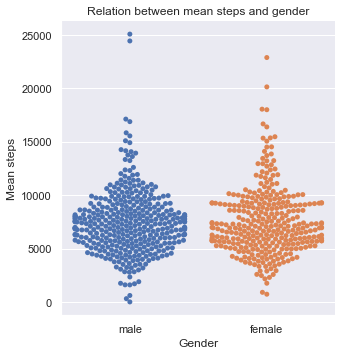

In [249]:
sns.catplot(x='gender',y='mean_steps', kind="swarm", data=steps_survey)
plt.title('Relation between mean steps and gender')
plt.ylabel('Mean steps')
plt.xlabel('Gender')

We subset the data first before we further visualize the distribution.
We also get some descriptive statistics we can visualize in the distributions.

In [297]:
gendersteps = steps_survey[["gender","mean_steps"]].dropna()

# Male setup
male_steps = gendersteps[gendersteps["gender"] == "male"]
total_males = len(male_steps)
male_mean = male_steps["mean_steps"].mean()
male_median = male_steps["mean_steps"].median()

# Female setup
female_steps = gendersteps[gendersteps["gender"] == "female"] 
total_females = len(female_steps)
female_mean = female_steps["mean_steps"].mean()
female_median = female_steps["mean_steps"].median()

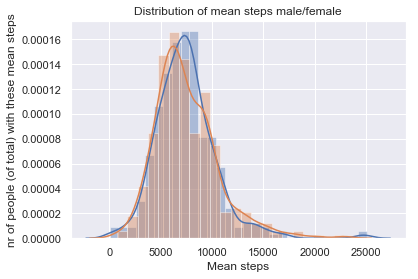

In [277]:
# Showcasing both distribution in one figure
fig, ax = plt.subplots()
sns.distplot(male_steps["mean_steps"], kde=True, ax=ax) 
sns.distplot(female_steps["mean_steps"], kde=True, ax=ax)
plt.xlabel("Mean steps")
plt.ylabel("nr of people (of total) with these mean steps")
plt.title(f'Distribution of mean steps male/female')
plt.show()

The blue line shows the distribution of mean steps from males, while the orange line shows it for females.
Overall, both distributions are normally distributed and a little right-tailed (mainly a few outliers on the right). Males seem to walk a more mean steps more often (median) than females. However, females have more high outliers, leading to a comparable mean. Below you can see each distribution in their own figure (including mean and median).

MALES
Mean: 7466.380812466227
Median: 7317.856087262491


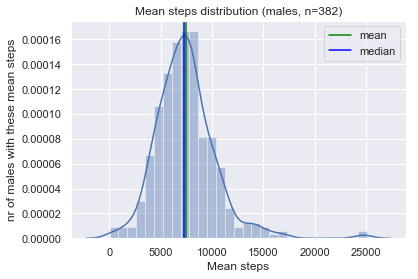

FEMALES
Mean: 7531.146196358323
Median: 6959.817361111111


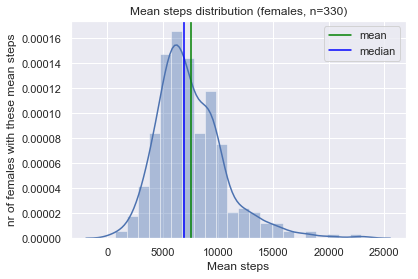

In [304]:
# Male distribution
print(f"MALES\nMean: {male_mean}\nMedian: {male_median}")
sns.distplot(male_steps["mean_steps"],kde=True)
plt.title(f"Mean steps distribution (males, n={total_males})")
plt.xlabel("Mean steps")
plt.ylabel("nr of males with these mean steps")
plt.axvline(male_mean, 0, 100, color='green', label='mean')
plt.axvline(male_median, 0, 100, color='blue', label='median')
plt.legend()
plt.show()

# Female distribution
print(f"FEMALES\nMean: {female_mean}\nMedian: {female_median}")
sns.distplot(female_steps["mean_steps"],kde=True)
plt.title(f"Mean steps distribution (females, n={total_females})")
plt.xlabel("Mean steps")
plt.ylabel("nr of females with these mean steps")
plt.axvline(female_mean, 0, 100, color='green', label='mean')
plt.axvline(female_median, 0, 100, color='blue', label='median')
plt.legend() 
plt.show()

As we know the means of the sample, we want to know if this difference is significant.
Let's do a hypothesis test of the differences in population means. Our hypotheses will be:

H0: The (population) mean steps is the same

H1: The (population) mean steps is different

We will try to reject the null-hypothesis by finding a significant effect. To find this, we use an independent t-test for both all mean steps of males and all mean steps of females.

In [312]:
ms_ttest = ttest_ind(male_steps["mean_steps"], female_steps["mean_steps"], nan_policy='omit')
print(f"T-value: {ms_ttest[0]}")
print(f"P-value: {ms_ttest[1]}")      

T-value: -0.2858852768689861
P-value: 0.7750493786892149


The t-value out of the t-test is -0.28. This value does not say much on its own.
However, the included p value shows us that the probability of this kind of difference happening in our H0 where we assume there is no difference, is not significant (P > 0.05). We can say there is no significant difference between mean steps between men and women and keep our null hypothesis (H0).

## The relation between two qualitative variables
Finally, we will look at the relation between two (or more) qualitative (categorial) variables. Lets bring up our qualitative options one last time.

In [376]:
steps_survey.loc[:,"city":"education"].head(2)

,city,gender,age,hh_size,hh_type,education
0,Montpellier,male,25-34,2,couple,master or doctorate
1,Montpellier,female,25-34,2,couple,high school


The most interesting to look at are gender and education. Lets subset the data before we work with it. We also want to know the distribution male/female to get more insights out of our analysis.

In [377]:
cge = steps_survey[["gender","education"]]
cge_vc = cge["gender"].value_counts()
cge.head(2)

,gender,education
0,male,master or doctorate
1,female,high school


Lets make crosstabs to get better insights into the frequency distribution. 
The second crosstab will consist of percentages. 

In [378]:
cge_crosstab = pd.crosstab(cge.education, cge.gender, margins=True)
cge_crosstab

gender,female,male,All
education,,,
bachelor,175,193,368
high school,68,38,106
master or doctorate,183,220,403
no degree,1,1,2
primary,6,5,11
vocational,16,22,38
All,449,479,928


In [379]:
cge_crosstab_perc = pd.crosstab(cge.education,cge.gender, normalize="index")
cge_crosstab_perc

gender,female,male
education,,
bachelor,0.475543,0.524457
high school,0.641509,0.358491
master or doctorate,0.454094,0.545906
no degree,0.500000,0.500000
primary,0.545455,0.454545
vocational,0.421053,0.578947


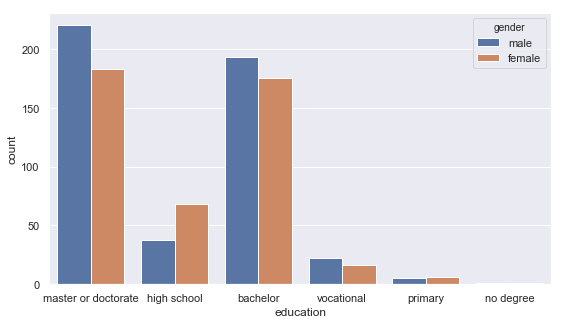

male      480
female    449
Name: gender, dtype: int64


In [382]:
plt.figure(figsize=(9,5))
sns.countplot(x="education", hue="gender", data=cge) #Selecting the rating column. I need to drop the NA's for the plot
plt.show()

print(cge_vc)

Males seem to have the highest form of education (master or doctorate) more often than females. Where males tops almost every category (because of the sample size difference between male and female) even when normalized, this is not the case for 'high school' as highest education taken. It seems that females more often than males do not proceed with education after high school than males. 

# Summary of thoughts
The steps dataset had a lot of missing vlaues, which made it hard to work with. The choice has been made to exclude many rows with missing values, which lead to much less strong hypothesis testing. 

Overall, findings were interesting. There is more walking activity during the warmer months. The mean steps of all days with walking activity was around 8100 steps. Females (mean: 7531) seemed to walk more than males (mean: 7466), however hypothesis testing with a t-test showed that the effect was not significant (t = -0.2858852768689861, p = 0.7750493786892149). For our quantitative variable: waist sizes seemed to be normally distributed with few outliers. When looking into correlation/relation of _mean steps taken_ with quantitative variables _height and weight_, visualizing our data showed that their is a negative linear relation of a persons weight and how much steps they take on average (mean steps). Calculating Pearsons R confirmed the significance of this relation (r = -0.16940707160199922, p = 5.655289511792799e-06, or < 0.001). For analysis of our qualitative variables, visualizing the data showed us that males more often have a higher education finished as females.